### #1753 최단경로
* https://www.acmicpc.net/problem/1753

In [35]:
#시간초과
import sys
input = sys.stdin.readline

V,E = map(int,input().split())
K = int(input().rstrip())
inf = sys.maxsize #거리 초기화를 위한 변수 설정
graph = [[] for _ in range(V+1)]
for _ in range(E) :
    u,v,w = map(int,input().split())
    graph[u].append((v,w)) #인접 리스트로 그래프 구성

visited = [False] * (V+1) #방문 여부

D = [inf] * (V+1) #최단거리 리스트
D[K] = 0 #시작노드로의 최단 거리는 0으로 설정

def dijkstra(graph, D, visited, V) :
    for i in range(1,V+1) : #시작 노드에서 가장 잛은 거리를 가지는 노드를 찾기 위해 모든 노드를 순회
        m = -1
        minimum = sys.maxsize
        for j in range(1,V+1) :
            if not visited[j] and D[j] < minimum :
                minimum = D[j]
                m = j
        visited[m] = True

        for destination, cost in graph[m] :
            if not visited[destination] :
                if D[m] + cost < D[destination] : #m을 거쳐서 지나가는 경로가 더 짧다면 갱신
                    D[destination] = D[m] + cost

dijkstra(graph, D, visited, V)
for i in range(1,V+1) :
    if D[i] == inf :
        print('INF')
    else :
        print(D[i])

1
0
[False, True, False, False, False]
[9223372036854775807, 0, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[9223372036854775807, 0, 9223372036854775807, 2, 9223372036854775807]
[9223372036854775807, 0, 9223372036854775807, 2, 2]
[9223372036854775807, 0, 9223372036854775807, 2, 2]
3
2
[False, True, False, True, False]
[9223372036854775807, 0, 9223372036854775807, 2, 2]
[9223372036854775807, 0, 6, 2, 2]
4
2
[False, True, False, True, True]
[9223372036854775807, 0, 6, 2, 2]
[9223372036854775807, 0, 3, 2, 2]
2
3
[False, True, True, True, True]
[9223372036854775807, 0, 3, 2, 2]
0
3
2
2


In [11]:
#heapq 사용
import sys
from heapq import * #우선순위큐로 heap을 사용
input = sys.stdin.readline

V,E = map(int,input().split())
K = int(input().rstrip())
inf = sys.maxsize #거리 초기화를 위한 inf값 설정
graph = [[] for _ in range(V+1)]
for _ in range(E) :
    u,v,w = map(int,input().split())
    graph[u].append((w,v)) #인접 리스트로 그래프 구성 
    #거리 순으로 정렬을 해야하므로, 가중치(거리)를 튜플의 첫번째 원소로 변경 
    #(v,w) -> (w,v)

visited = [False] * (V+1) #방문 여부

D = [inf] * (V+1) #최단거리 리스트
D[K] = 0 #시작노드로의 최단 거리는 0으로 설정

def dijkstra(graph, D, visited) :
    min_heap = []
    '''
    #가장 잛은 거리를 가지는 노드를 찾기 위해 모든 노드를 순회
    for i in range(1,V+1) :
        m = -1
        minimum = sys.maxsize
        for j in range(1,V+1) :
            if not visited[j] and D[j] < minimum :
                minimum = D[j]
                m = j
    '''
    heappush(min_heap,(0,K))
    while min_heap : 
        dist, current = heappop(min_heap)
        if visited[current] :
            continue #이미 방문했다면 처음으로 돌아가 최솟값을 다시 pop
        visited[current] = True

        for cost, destination in graph[current] :
            if not visited[destination] :
                if D[current] + cost < D[destination] : #m을 거쳐서 지나가는 경로가 더 짧다면 갱신
                    D[destination] = D[current] + cost
                    heappush(min_heap, (D[destination], destination)) #최소 힙에 (거리, 목적지) 추가

dijkstra(graph, D, visited, V)
for i in range(1,V+1) :
    if D[i] == inf :
        print('INF')
    else :
        print(D[i])

0
2
3
7
INF


### #1504 특정한 최단 경로
* https://www.acmicpc.net/problem/1504
1 -> v1 -> v2 -> N 까지의 경로 길이를 나누어 구한 뒤에 합한다.

처음 짠 코드
```python
import sys
from heapq import *
input = sys.stdin.readline

N, E = map(int,input().split())
graph = [[] for _ in range(N+1)] #인덱스를 맞춰주기 위해 +1
for _ in range(E) :
    a,b,c = map(int,input().split())
    graph[b].append((c,a)) #heapq 사용을 위해 (가중치, 목적지) 순으로 
    graph[a].append((c,b)) #양방향이므로

v1, v2 = map(int,input().split()) #반드시 지나야 하는 두 개의 정점

inf = sys.maxsize

def Dijkstra(graph, D, start, visited) :
    pq = []
    heappush(pq, (0,start))
    
    while pq :
        dist, current = heappop(pq)
        if visited[current] :
            continue
        visited[current] = True

        for cost, destination in graph[current] :
            if not visited[destination] :
                if D[current] + cost < D[destination] :
                    D[destination] = D[current] + cost
                    heappush(pq, (D[destination], destination))

cnt = 0
for start,end in zip([1,v1,v2],[v1,v2,N]) :
    # 매번 재 설정
    visited =[False] * (N+1) 
    D = [inf] * (N+1)
    D[start] = 0 #start 정점부터 시작
    Dijkstra(graph, D, start, visited)
    cnt += D[end]

if cnt >= inf :
    print(-1)
else :
    print(cnt)
```
하지만 이 코드는 예제는 풀지만

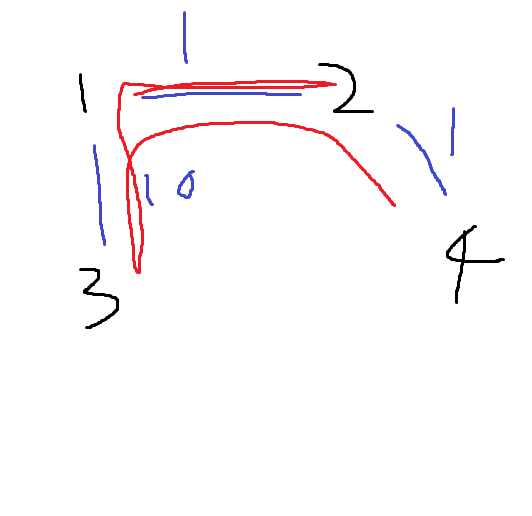

위의 그래프에서 2,3번 노드를 v1,v2로 설정하면 짜여진 코드에서는 24를 반환하는데, 실제 답은 22이다.

v2를 먼저 들릴 수도 있다는 사실을 생각하지 못해서 문제가 발생했고 이후에 코드를 수정했다.

In [17]:
import sys
from heapq import *
input = sys.stdin.readline

N, E = map(int,input().split())
graph = [[] for _ in range(N+1)] #인덱스를 맞춰주기 위해 +1
for _ in range(E) :
    a,b,c = map(int,input().split())
    graph[b].append((c,a)) #heapq 사용을 위해 (가중치, 목적지) 순으로 
    graph[a].append((c,b)) #양방향이므로

v1, v2 = map(int,input().split()) #반드시 지나야 하는 두 개의 정점

inf = sys.maxsize

def Dijkstra(graph, D, start, visited) :
    pq = []
    heappush(pq, (0,start))
    
    while pq :
        dist, current = heappop(pq)
        if visited[current] :
            continue
        visited[current] = True

        for cost, destination in graph[current] :
            if not visited[destination] :
                if D[current] + cost < D[destination] :
                    D[destination] = D[current] + cost
                    heappush(pq, (D[destination], destination))

cnt1 = 0
for start,end in zip([1,v1,v2],[v1,v2,N]) :
    # 매번 재 설정
    visited =[False] * (N+1) 
    D = [inf] * (N+1)
    D[start] = 0 #start 정점부터 시작
    Dijkstra(graph, D, start, visited)
    cnt1 += D[end]

cnt2 = 0
for start,end in zip([1,v2,v1],[v2,v1,N]) :
    # 매번 재 설정
    visited =[False] * (N+1) 
    D = [inf] * (N+1)
    D[start] = 0 #start 정점부터 시작
    Dijkstra(graph, D, start, visited)
    cnt2 += D[end]

cnt = min(cnt1,cnt2)
if cnt >= inf :
    print(-1)
else :
    print(cnt)

1
11
12
10
11
1
22


### #13549 숨바꼭질 3
* https://www.acmicpc.net/problem/13549
* https://nicotina04.tistory.com/168
> 0-1 BFS(Zero-One BFS)는 그래프에서 가중치가 0 또는 1로만 주어진 경우에 최단 경로를 찾기 위한 BFS의 변형 알고리즘입니다. 특히 다익스트라 알고리즘보다 더 효율적으로 동작할 수 있습니다. 0-1 BFS는 다음과 같은 특수한 조건에서 사용됩니다.
>
> - 가중치가 0 또는 1로만 주어진 그래프
> - 그래프의 가중치가 0인 경우에는 덱(deque)의 front에, 가중치가 1인 경우에는 덱의 back에 노드를 추가
>
> 아래는 0-1 BFS의 동작 과정입니다:
>
> 1. 덱의 front에서 현재 노드를 꺼냅니다.
> 2. 연결된 인접 노드를 살펴봅니다.
> 3. 현재 노드까지 소비된 비용 + 그 노드를 향하는 가중치 < 그 노드까지 가는데 소비된 비용이면 소비된 비용을 갱신합니다.
> 4. 노드가 갱신된 상태에서 만약 그 노드를 향하는 가중치가 0이면 덱의 front, 1이면 덱의 back에 삽입합니다.
> 5. 덱에서 더 이상 꺼낼 노드가 없을 때까지 위 과정을 반복합니다.
>
> 이러한 방식으로 0-1 BFS는 노드의 갱신을 효율적으로 수행하며,
> 시간 복잡도는 O(V + E)입니다.

```python
#0-1 BFS
import sys
from collections import deque
N, K = map(int,input().split())
visited = [False]*100001
inf = sys.maxsize
D = [inf]*100001
D[N] = 0

def BFS(v) :
    q = deque([v])
    visited[v] = True
    while q :
        n = q.popleft()
        for next in [n+1,n-1,2*n] : #3가지 case의 인접 노드
            if 0<=next<=100000 : #범위 내에 존재하는 경우
                if visited[next] :
                    continue #이미 방문했다면 skip
                #2*n인 경우 가중치가 0이므로 별도의 if문으로
                #현재 노드까지 소비된 비용 + 그 노드를 향하는 가중치 < 그 노드까지 가는데 소비된 비용이면 비용 D[next]를 갱신
                if next == 2*n and D[n] < D[next]: 
                    D[next] = D[n]
                    visited[next] = True
                    q.appendleft(next) #가중치가 0인 경우 deque의 front에 삽입
                else :
                    #현재 노드까지 소비된 비용 + 그 노드를 향하는 가중치 < 그 노드까지 가는데 소비된 비용이면 비용 D[next]을 갱신
                    if D[n] + 1 < D[next] :
                        D[next] = D[n] + 1
                        visited[next] = True
                        q.append(next)
BFS(N)
print(D[K])
```

4,6 test case에 대해 2라는 오답이 발생
* https://www.acmicpc.net/board/view/38887#comment-69010

In [36]:
#0-1 BFS correction
import sys
from collections import deque
N, K = map(int,input().split())
visited = [False]*100001
inf = sys.maxsize
D = [inf]*100001
D[N] = 0

def BFS(v) :
    q = deque([v])
    visited[v] = True
    while q :
        n = q.popleft()
        for next in [n-1,n+1,2*n] : #3가지 case의 인접 노드 
            #4,6이라는 case를 해결하기 위해 n-1을 먼저 탐색
            if 0<=next<=100000 : #범위 내에 존재하는 경우
                if visited[next] :
                    continue #이미 방문했다면 skip
                #2*n인 경우 가중치가 0이므로 별도의 if문으로
                #현재 노드까지 소비된 비용 + 그 노드를 향하는 가중치 < 그 노드까지 가는데 소비된 비용이면 비용 D[next]를 갱신
                if next == 2*n and D[n] < D[next]: 
                    D[next] = D[n]
                    visited[next] = True
                    q.appendleft(next) #가중치가 0인 경우 deque의 front에 삽입
                #현재 노드까지 소비된 비용 + 그 노드를 향하는 가중치 < 그 노드까지 가는데 소비된 비용이면 비용 D[next]을 갱신
                elif next != 2*n and D[n] + 1 < D[next] :
                    D[next] = D[n] + 1
                    visited[next] = True
                    q.append(next)
BFS(N)
print(D[K])

1


### #9370 미확인 도착지
* https://www.acmicpc.net/problem/9370
* https://velog.io/@7h13200/Python%EB%B0%B1%EC%A4%80-9370%EB%B2%88-%EB%AF%B8%ED%99%95%EC%9D%B8-%EB%8F%84%EC%B0%A9%EC%A7%80

In [1]:
import sys
from heapq import *
input = sys.stdin.readline

def Dijkstra(graph, start, target, g, h) :
    pq = []
    heappush(pq, (0,start,False))
    D = [(sys.maxsize, False) for _ in range(n+1)]
    D[start] = (0,False)
    
    while pq :
        dist, current, check = heappop(pq)
        for next, dis in graph[current] :
            temp = check
            if (next == g and current == h) or (next == h and current == g) :
                temp = True
            
            if dist + dis < D[next][0] :
                D[next] = (dist+dis, temp)
                heappush(pq, (dist+dis, next, temp))
            
            if not D[next][1] and temp and dist + dis == D[next][0] : #이 부분 dist + dis == D[next][0]여야 하는 이유?
                D[next] = (dist+dis, temp)
                heappush(pq, (dist+dis, next, temp))

    ans = []
    for i in target :
        if D[i][1] :
            ans.append(i)
    
    ans.sort()
    return ans

T = int(input())
for _ in range(T) :
    n,m,t = map(int,input().split()) #교차로(정점), 도로(간선), 목적지 후보
    s,g,h = map(int,input().split()) #출발지
    graph = [[] for __ in range(n+1)]
    for i in range(m) :
        a,b,d = map(int,input().split()) #a와 b사이에 길이 d의 양방향 도로가 존재
        graph[a].append((b,d))
        graph[b].append((a,d))

    target = [int(input()) for j in range(t)]

    print(*Dijkstra(graph,s,target,g,h))

4 5


### #11657 타임머신
* https://www.acmicpc.net/problem/11657
* https://www.acmicpc.net/board/view/131713

만약 **1번 도시에서 출발해 어떤 도시로 가는 과정에서 시간을 무한히 오래 전으로 되돌릴 수 있다면** 첫째 줄에 -1을 출력한다. 그렇지 않다면 N-1개 줄에 걸쳐 각 줄에 1번 도시에서 출발해 2번 도시, 3번 도시, ..., N번 도시로 가는 가장 빠른 시간을 순서대로 출력한다. 만약 해당 도시로 가는 경로가 없다면 대신 -1을 출력한다.


> 이 문제에서 1번 노드와 연결되지 않으면 음의 싸이클이든 뭐든 -1을 출력해야 합니다.
>
> 벨만-포드 알고리즘을 사용한 경우 dist 배열을 INF로 초기화 한 후, dist[i] == INF 의 경우 계속 continue 해줘야 합니다.
>
> 저는 V-1번 탐색할 때는 했는데 마지막에 음의 간선 체크할 때 누락했다가 계속 틀리고 있었습니다 !!

예시

// input

3 2

2 3 -1

3 2 -2

// answer

-1

-1

In [ ]:
import sys
input = sys.stdin.readline
INF = sys.maxsize
N, M = map(int,input().split())
graph = [[] for _ in range(N+1)]
for _ in range(M) :
    A,B,C = map(int,input().split())
    graph[A].append((B,C))

def Bellman_Ford(start, graph) :
    D = [INF]*(N+1)
    D[start] = 0
    for _ in range(N-1) : #가중치 갱신을 (노드 수 -1)회 수행
        for i in range(1,N+1) :
            if D[i] != INF : #INF가 아닌 경우, 즉 현재 노드에 도달할 수 있는 경우
                for next, cost in graph[i] : #graph[i]가 비어있는 경우 반복문이 스킵
                    #print(i, next, cost)
                    if D[i] + cost < D[next] :
                        #print('갱신', D[i] + cost)
                        D[next] = D[i] + cost
    #print(D)
    for i in range(1,N+1) :
        if D[i] != INF : #INF가 아닌 경우, 즉 현재 노드에 도달할 수 있는 경우

            ###도달할 수 없는 음수 사이클의 경우, -1을 반환하는 것이 아니라, 사이클에 해당하는 노드들에 대해 -1을 출력해주어야 함
            
            for next, cost in graph[i] :
                if D[i] + cost < D[next] :#만약 if D[i] != INF 가 없다면, 도달할 수 없는 노드가 존재하는 경우 -1이 반환됨
                    return -1
    #print(D)
    for i in range(1,N+1) :
        if D[i] == INF :
            D[i] = -1
    #print(D)
    return D

ans = Bellman_Ford(1, graph)
if ans == -1 :
    print(ans)
else :
    for i in range(2,N+1) :
        print(ans[i])

### #11404 플로이드
* https://www.acmicpc.net/problem/11404
* https://blog.naver.com/no_spell_compile/223358378523

In [1]:
import sys
INF = sys.maxsize
input = sys.stdin.readline

n = int(input())
m = int(input())
D = [[INF]*(n+1) for _ in range(n+1)]
for i in range(1,n+1) :
    D[i][i] = 0
for _ in range(m) :
    a, b, c = map(int,input().split())
    D[a][b] = min(D[a][b],c)

def Floyd_Warshall(D) :
    for i in range(1,n+1) :
        for j in range(1,n+1) :
            for k in range(1, n+1) :
                D[j][k] = min(D[j][k], D[j][i] + D[i][k])
    
    '''음수 사이클 확인
    for i in range(1,n+1) :
        if D[i][i] < 0 :
            return -1
    '''

    for i in range(1,n+1) :
        for j in range(1,n+1) :
            if D[i][j] == INF :
                D[i][j] = 0 #도달할 수 없는 경우 0을 출력
    
    return D

D = Floyd_Warshall(D)
for i in range(1,n+1) :
    print(* D[i][1:])

0 2 3 1 4
12 0 15 2 5
8 5 0 1 1
10 7 13 0 3
7 4 10 6 0
